# Classical control, measures and resets

## Quantum and classical bit allocation

The allocation of quantum and classical bits is done via the ``qalloc`` and ``calloc`` methods, respectively. They return a register, which will then be used to refer to the qubits or classical bits.

In the following snippet, we allocated an 8-qubit register as well a classical register with 8 bits:

In [2]:
qbits = prog.qalloc(8)
cbits = prog.calloc(8)

## Measure
A measure is applied via the ``measure`` method. The result of the measure of a quantum bit is stored in a classical bit:

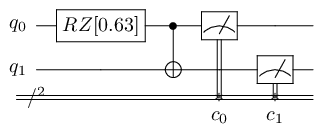

In [4]:
from qat.lang.AQASM import Program, RZ, CNOT
from math import pi

prog = Program()
qbits = prog.qalloc(2)
cbits = prog.calloc(2)
prog.apply(RZ(pi/5), qbits[0])
prog.apply(CNOT, qbits)
prog.measure(qbits, cbits)

circ = prog.to_circ()
%qatdisplay circ

## Classical control

Here, we apply a Hadamard gate on second qubit classically controlled by second bit (it requires the classical bit to be initialized):
![figure](../../img/CCH.png)

In [6]:
from qat.lang.AQASM import Program, H

prog = Program()
cbits = prog.calloc(5)
qbits = prog.qalloc(5)
# Initializing cbits[2]
prog.measure(qbits[4], cbits[2])
# Apply Hadamard only if cbits[2] is set
prog.cc_apply(cbits[2], H, qbits[2])

## Qubit reset

The following snippet shows how to reset a qubit.

In [7]:
from qat.lang.AQASM import Program 

prog = Program()
qbits = prog.qalloc(8)


# Reseting qubits 1, 3 and 4.
prog.reset([qbits[1], qbits[3:5]])
print(prog.op_list[0].qbits)

[<qat.lang.AQASM.bits.Qbit object at 0x7fa9e6fb6fa0>, <qat.lang.AQASM.bits.Qbit object at 0x7fa9e6fb6ac0>, <qat.lang.AQASM.bits.Qbit object at 0x7fa9e6fb6af0>]


## Cbit reset

The reset method also allows to reset a classical bit.

In [8]:
from qat.lang.AQASM import Program 

prog = Program()
qbits = prog.qalloc(8)
cbits = prog.calloc(8)

# Reseting qubits 1, 3 and 4, and cbit 0.
prog.reset([qbits[1], qbits[3:5]], [cbits[0]])
# Reseting only cbit 1
prog.reset([], [cbits[1]])
print(prog.op_list[0].qbits)
print(prog.op_list[0].cbits)
print(prog.op_list[1].qbits)
print(prog.op_list[1].cbits)

[<qat.lang.AQASM.bits.Qbit object at 0x7fa9e6fa46d0>, <qat.lang.AQASM.bits.Qbit object at 0x7fa9e6fa4790>, <qat.lang.AQASM.bits.Qbit object at 0x7fa9e6fa4250>]
[]


## Logic operations on classical bits


Here, we set the classical bit of index 0 through a logic operation on classical bits 1 and 2 (which have themselves been initialized through measurement).

The second argument of the logic method is a boolean formula built using operators '&', '|', '^', '~' and cbits.

In [9]:
from qat.lang.AQASM import Program

prog = Program()
qbits = prog.qalloc(2)
cbits = prog.calloc(8)
prog.measure(qbits, cbits[1:3])
prog.logic(cbits[0], cbits[1] & cbits[2])